In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
path = os.getcwd()
files = os.listdir(path)
filesxlsx = [f for f in files if f[-4:] == 'xlsx']
filesxlsx

['BW2-25-2025-13-21.xlsx',
 'BW2-25-2025-13-24.xlsx',
 'BW2-25-2025-13-19.xlsx',
 'BW2-25-2025-13-15.xlsx',
 'BW2-25-2025-13-20.xlsx',
 'BW2-25-2025-13-16.xlsx',
 'BW2-25-2025-13-22.xlsx',
 'BW2-25-2025-13-23.xlsx',
 'BW2-25-2025-13-17.xlsx',
 'BW2-25-2025-13-18.xlsx']

In [3]:
xrange = 101
ydata = np.zeros((xrange,10))

filenum = -1
for filepath in filesxlsx:
    filenum += 1
    df = pd.read_excel(filepath, sheet_name=None)
    for i, elem in enumerate(df['data'].y):
        ydata[i][filenum] = elem
        
ydata_ave = [np.average(measurements) for measurements in ydata]
ydata_std = [np.std(measurements) for measurements in ydata]
x_data = df['data'].x

<ErrorbarContainer object of 3 artists>

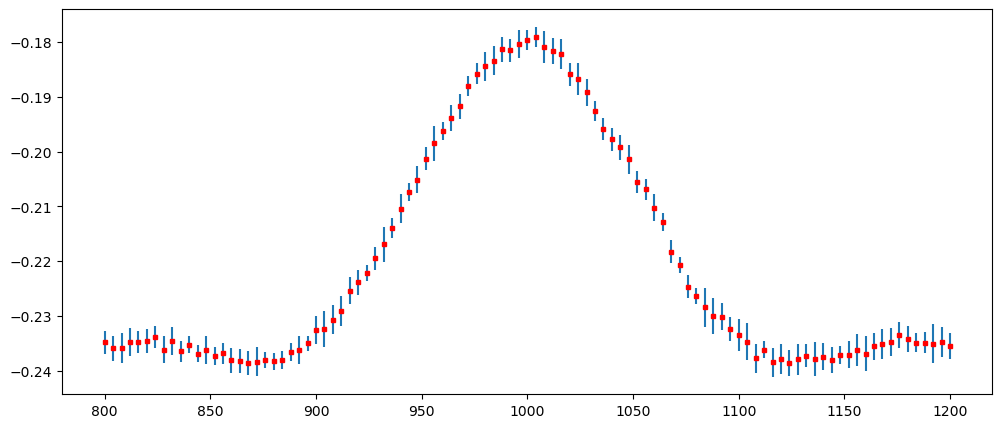

In [4]:
plt.figure(figsize=(12,5))

plt.errorbar(x_data, ydata_ave, ydata_std, marker='s', mfc='red',
         mec='red', ls="None", ms=3)

In [5]:
def f(w, T2, w0):
    return (1/T2)/((1/T2)**2 + (w0-w)**2)
def fit(w, A, B, C, T2, w1, w2):
    return C - (A*f(w, T2, w1) + B*f(w, T2, w2))
vectorfit = np.vectorize(fit)

In [6]:
parameters, covariance = scipy.optimize.curve_fit(vectorfit, x_data, ydata_ave, p0 = [0.006,0.006,-0.8945,1,2880,2900])
parameters, covariance = scipy.optimize.curve_fit(vectorfit, x_data, ydata_ave, p0 = parameters)

/home/peter/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [7]:
A, B, C, T2, w1, w2 = parameters
x_fit = np.arange(np.array(x_data)[0],np.array(x_data)[-1],0.1)
y_fit = fit(x_fit, A, B, C, T2, w1, w2)

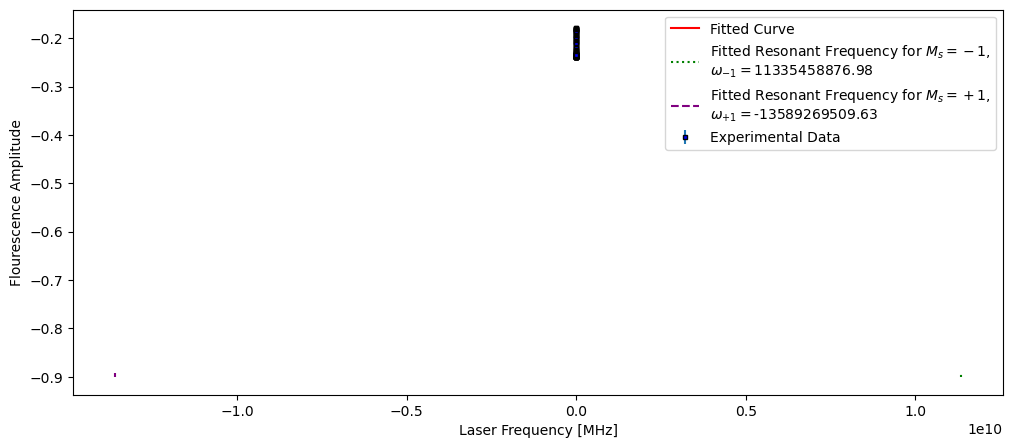

In [8]:
plt.figure(figsize=(12,5))

plt.errorbar(x_data, ydata_ave, ydata_std, marker='s', mfc='blue',
         mec='black', ls="None", ms=3, label = 'Experimental Data')
plt.plot(x_fit, y_fit, 'red', label = 'Fitted Curve')
plt.vlines(w1,-0.901,-0.8925, 'green', ls=':', label = 'Fitted Resonant Frequency for $M_s=-1$,\n$\omega_{-1}=$'+str(np.round(w1,2)))
plt.vlines(w2,-0.901,-0.8925, 'purple', ls='--', label = 'Fitted Resonant Frequency for $M_s=+1$,\n$\omega_{+1}=$'+str(np.round(w2,2)))
plt.xlabel("Laser Frequency [MHz]")
plt.ylabel("Flourescence Amplitude")
plt.legend()

In [9]:
dA, dB, dC, dT2, dw1, dw2 = np.sqrt(np.diagonal(covariance))
print(w1, w2, dw1, dw2)

11335458876.983822 -13589269509.629402 inf inf
